## Sinewave

In [32]:
%tensorflow_version 2.6

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.6`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.19.5
TensorFlow 2.7.0
Keras 2.7.0


In [4]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

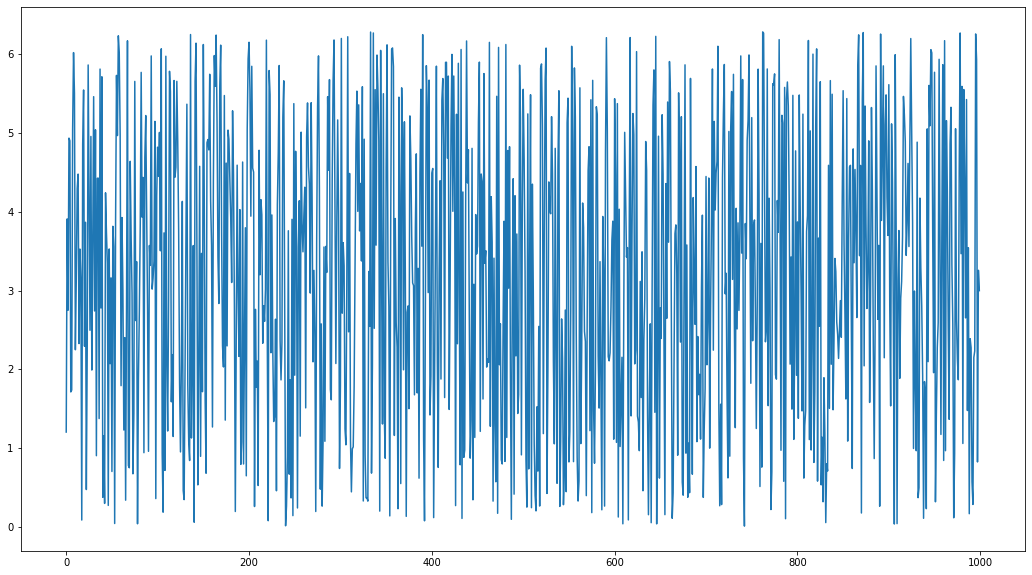

In [5]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.figure(figsize=(18,10))
plt.plot(x_values);

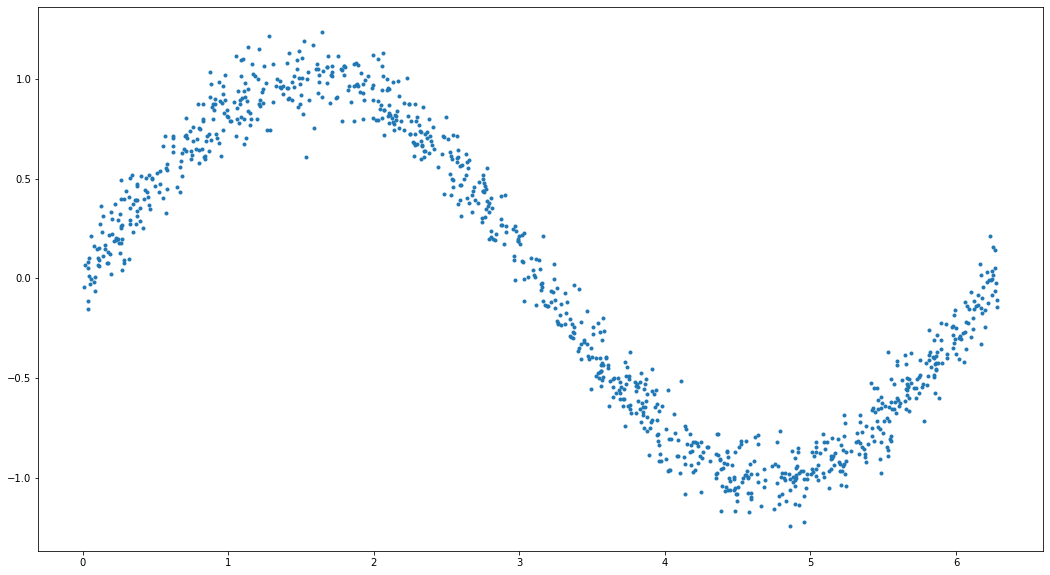

In [6]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(x_values, y_values, '.');

In [10]:
x_values = x_values.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values,y_values, 
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

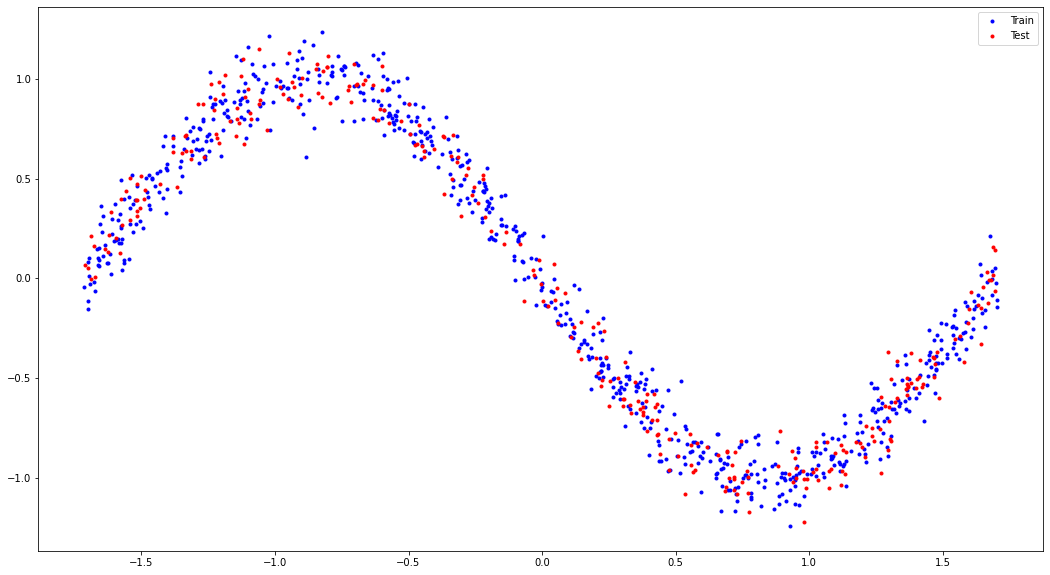

In [14]:
# Plot the data in each partition in different colors:
plt.figure(figsize=(18,10))
plt.plot(X_train, y_train, 'b.', label="Train")
plt.plot(X_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [15]:
# Create a model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(1,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [16]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [21]:
# Train model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    #validation_data=(x_val, y_val)
                    )

Epoch 1/500
7/7 [==============================] - 3s 4ms/step - loss: 0.5729 - mae: 0.5729
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.5005 - mae: 0.5005
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4647 - mae: 0.4647
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4409 - mae: 0.4409
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4207 - mae: 0.4207
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4020 - mae: 0.4020
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3867 - mae: 0.3867
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3737 - mae: 0.3737
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3621 - mae: 0.3621
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3519 - mae: 0.3519
Epoch 11/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3431 

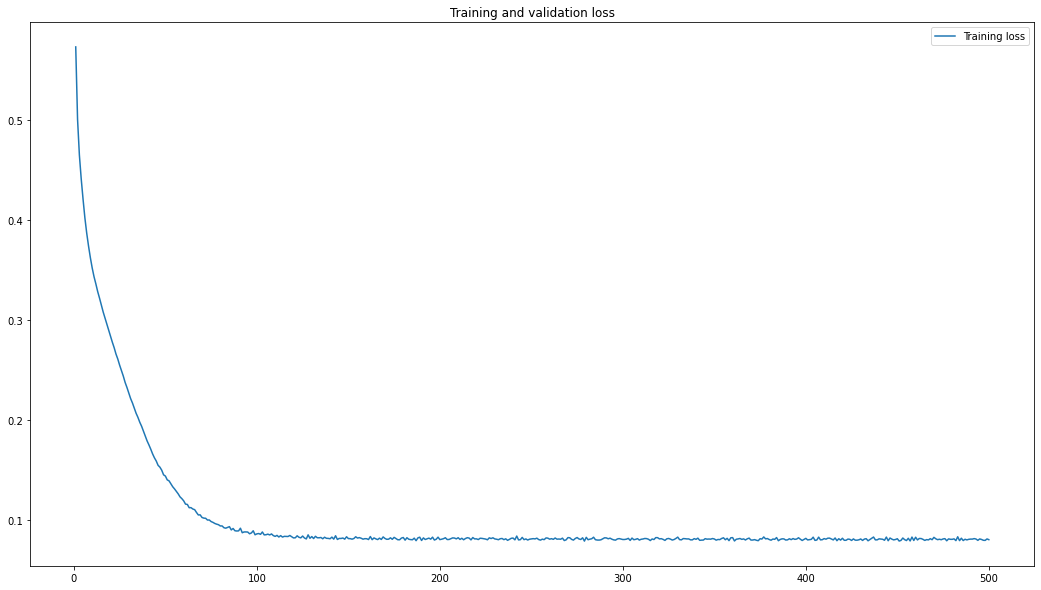

In [24]:
# Plot the training history
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(18,10))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

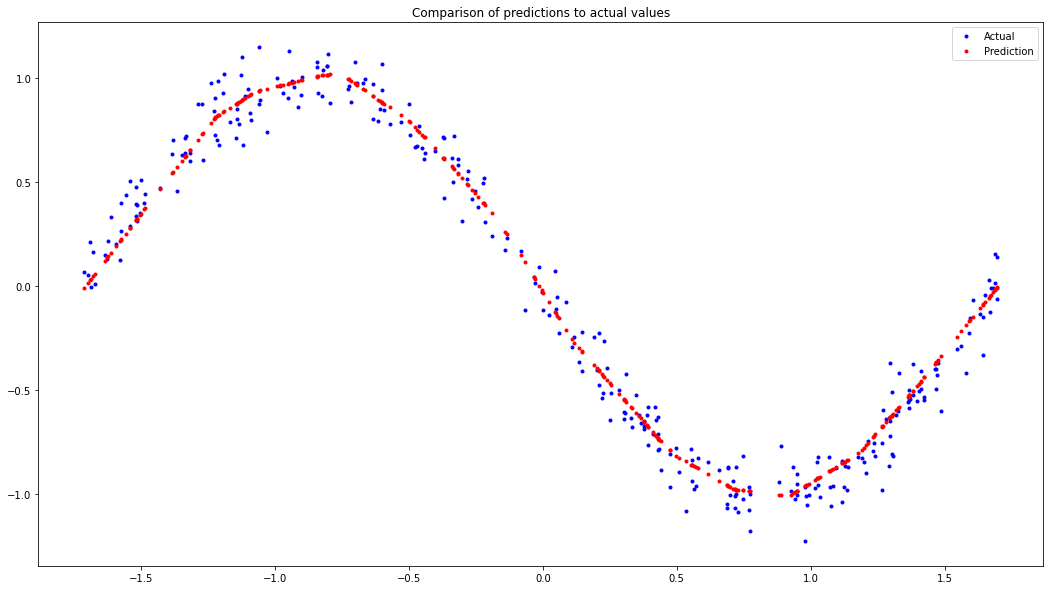

In [26]:
# Plot predictions against actual values
predictions = model.predict(X_test)

plt.figure(figsize=(18,10))
plt.title("Comparison of predictions to actual values")
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

## Save Model TF Format

In [27]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Load Model TF Format

In [28]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


## Save Model Keras Format

In [29]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

## Load Model Keras Format

In [30]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')
# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpyhn193hq/assets


INFO:tensorflow:Assets written to: /tmp/tmpyhn193hq/assets


3008